# Preparing the tools to be used

## View your Packages Version

In [1]:
!pip list

Package                      Version
---------------------------- -------------
absl-py                      1.2.0
apturl                       0.5.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.8
astunparse                   1.6.3
attrs                        22.1.0
autocorrect                  2.6.1
backcall                     0.2.0
bcrypt                       3.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
blinker                      1.4
blosc                        1.11.1
Brlapi                       0.8.3
cachetools                   5.2.0
certifi                      2020.6.20
cffi                         1.15.1
chardet                      4.0.0
click                        8.0.3
colorama                     0.4.4
command-not-found            0.3
contourpy                    1.0.5
cryptography                 3.4.8
cupshelpers                  1.0
cvxopt                       1.3.0
cvxpy 

## Display the python version in use

In [2]:
!python3 --version

Python 3.10.6


# Image Classification with Data Augmentation

In this project, we will use TensorFlow and Keras to build a convolutional neural network (CNN) that can classify images of hand gestures. We will use a custom dataset of 26 classes, each representing a letter of the English alphabet. We will also apply data augmentation techniques to increase the diversity and size of our training data.

## Import Libraries
We will need the following libraries for this project:

* tensorflow and keras for building and training the CNN model
* numpy and matplotlib for numerical computation and visualization
* os and cv2 for file and image manipulation
* mediapipe for hand gesture detection and cropping

We will also use the ImageDataGenerator class from tensorflow.keras.preprocessing.image to create image data generators with data augmentation.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import mediapipe as mp

2023-06-03 18:18:18.813320: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-03 18:18:19.065671: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-03 18:18:19.067883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-03 18:18:20.564061: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Define Paths for Data Directories
We will use a custom dataset that contains images of hand gestures in different poses and contrast. The dataset is divided into two directories: `Train` and `Valid`, which contain the training and validation images respectively. Each directory has 26 subdirectories, one for each class label. The class labels are the letters of the English alphabet from A to Z.

We will define the paths for these directories using the os module. We will also define some hyperparameters for our training process, such as the batch size, the number of classes, and the number of epochs.

In [4]:
# Define paths for data directories
# DATADIR = '/content/drive/MyDrive/Colab Notebooks/dataset/custom_data/'
DATADIR = './dataset/'
TRAIN_PATH = os.path.join(DATADIR, 'Train')
VALID_PATH = os.path.join(DATADIR, 'Valid')

# Define hyperparameters for training
batch_size = 32 # Batch size for mini-batch gradient descent
num_classes = 27 # Number of classes to classify
epochs = 75 # Number of epochs to train the model

## Create Image Data Generator with Data Augmentation

To increase the diversity and size of our training data, we will apply data augmentation techniques to our images. Data augmentation is a process of applying random transformations to the images, such as rotation, shifting, shearing, zooming, flipping, etc. This helps prevent overfitting by creating more variations of the original images.

We will use the `ImageDataGenerator` class from `tensorflow.keras.preprocessing.image` to create an image data generator with data augmentation. This class allows us to define various parameters for the transformations, such as the range of rotation, shift, shear, zoom, etc. It also allows us to rescale the pixel values of the images to a range between 0 and 1, which is a common practice for neural network inputs.

We will create one image data generator for our training data with data augmentation, and another one for our validation data without data augmentation.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Create image data generator with data augmentation for training data
# Data augmentation helps prevent overfitting by applying random transformations to the images
train_datagen = ImageDataGenerator(
    rescale=1./255, # Rescale pixel values to [0, 1] range
    rotation_range=20, # Rotate images randomly by up to 20 degrees
    width_shift_range=0.1, # Shift images horizontally by up to 10% of their width
    height_shift_range=0.1, # Shift images vertically by up to 10% of their height
    shear_range=0.2, # Shear images by up to 20 degrees
    zoom_range=0.2, # Zoom in or out of images by up to 20%
    horizontal_flip=True, # Flip images horizontally with 50% probability
    fill_mode='nearest' # Fill the empty pixels after transformation with the nearest pixel value
)

# Create image data generator for validation data
# No data augmentation is applied to validation data
val_datagen = ImageDataGenerator(rescale=1./255) # Rescale pixel values to [0, 1] range

## Load Training and Validation Data from Directory
We can use the `flow_from_directory` method of the image data generator to load our images from their directories. This method takes in several arguments, such as:

* The directory path where the images are stored.
* The target size of the images after resizing.
* The color mode of the images (RGB or grayscale).
* The batch size for generating batches of images.
* The class mode for generating labels (categorical or binary).

The method returns an iterator that yields batches of images and labels. We can use this iterator as an input for our model training.

We will load our training and validation data using this method with the following parameters:

* The directory paths are defined by TRAIN_PATH and TEST_PATH.
* The target size is (224, 224), which is a common input size for CNN models.
* The color mode is RGB, since our images are in color.
* The batch size is defined by batch_size.
* The class mode is categorical, since we have more than two classes.

In [7]:
# Load training and validation data from directory using image data generator
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH, # Directory of training images
    target_size=(224, 224), # Resize images to 224x224 pixels
    color_mode='rgb', # Use RGB color mode for images
    batch_size=batch_size,
    class_mode='categorical' # Use one-hot encoding for labels (e.g. [0, 0, 1, ...])
)

val_generator = val_datagen.flow_from_directory(
    VALID_PATH, # Directory of validation images
    target_size=(224, 224), # Resize images to 224x224 pixels
    color_mode='rgb', # Use RGB color mode for images
    batch_size=batch_size,
    class_mode='categorical' # Use one-hot encoding for labels (e.g. [0, 0, 1, ...])
)

Found 4590 images belonging to 27 classes.
Found 1350 images belonging to 27 classes.


# Visualize Training and Validation Images

To get a sense of what our images look like, we can plot some of them using matplotlib. We will randomly select one image from each batch of training and validation data, and display them with their corresponding labels.

In [8]:
training_images, training_labels = next(train_generator)
validation_images, validation_labels = next(val_generator)

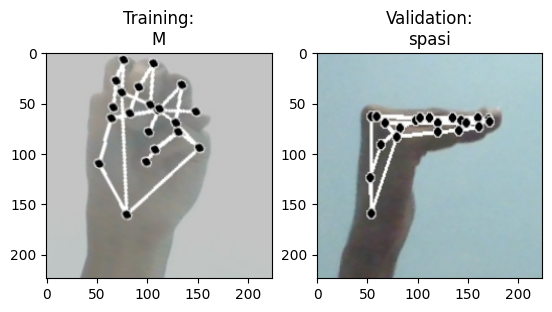

In [45]:
# Choose a random index from each batch
training_index = np.random.randint(len(training_images))
validation_index = np.random.randint(len(validation_images))

# Define the class labels as the letters of the alphabet
CATEGORIES = [chr(i + 65) for i in range(26)] + ['spasi']

# Get the corresponding label for each image
training_label = CATEGORIES[np.argmax(training_labels[training_index])]
validation_label = CATEGORIES[np.argmax(validation_labels[validation_index])]

# Plot the images and their labels using matplotlib
plt.subplot(1,2,1) # Create a subplot with 1 row and 2 columns
plt.title(f"Training:\n{training_label}") # Set the title of the first subplot
plt.imshow(training_images[training_index]) # Show the training image

plt.subplot(1,2,2) # Create another subplot with 1 row and 2 columns
plt.title(f"Validation:\n{validation_label}") # Set the title of the second subplot
plt.imshow(validation_images[validation_index]) # Show the validation image

plt.show() # Display the plot

We can see that the images have different poses, backgrounds, lighting conditions, etc. We can also see that some of them are flipped horizontally due to data augmentation. The labels are shown as the letters of the alphabet that correspond to the hand gestures.

# Get Information about Images and Labels

To get some information about our images and labels, such as their shape, size, and number, we can define a function that prints these details. We will call this function get_info_imgs and pass it three arguments:

* img: The array of images to get information about.
* label: The array of labels to get information about.
* which_data: A string that indicates whether the data is training or validation.

The function will print the following information:

* The shape of the image array, which tells us the number of images, the height, the width, and the number of channels (RGB) of each image.
* The size of the image array in kilobytes (KB) and megabytes (MB), which tells us how much memory the array occupies.
* The size of one image in kilobytes (KB) and megabytes (MB), which tells us how much memory one image occupies.
* The shape of the label array, which tells us the number of labels and the number of classes (one-hot encoded).

In [9]:
def get_info_imgs(img, label, which_data):
  print(which_data)
  print(f"\tshape: {img.shape} \n\tsize (kb): {img.nbytes / 1024} kb \n\tsize (mb): {(img.nbytes / 1024) / 1024} mb \n\tsize 1 img(kb): {img[0].nbytes / 1024} kb \n\tsize 1 img(mb): {(img[0].nbytes / 1024) / 1024} mb \n\tlabels: {label.shape}")

In [10]:
# Call the function for training and validation data
get_info_imgs(training_images, training_labels, "Training")
get_info_imgs(validation_images, validation_labels , "Validation")

Training
	shape: (32, 224, 224, 3) 
	size (kb): 18816.0 kb 
	size (mb): 18.375 mb 
	size 1 img(kb): 588.0 kb 
	size 1 img(mb): 0.57421875 mb 
	labels: (32, 27)
Validation
	shape: (32, 224, 224, 3) 
	size (kb): 18816.0 kb 
	size (mb): 18.375 mb 
	size 1 img(kb): 588.0 kb 
	size 1 img(mb): 0.57421875 mb 
	labels: (32, 27)


## Build the Model using Transfer Learning
To build our CNN model, we will use transfer learning, which is a technique of reusing a pre-trained model and adapting it to our specific task. Transfer learning can save us time and resources, as well as improve our performance by leveraging the knowledge learned from a large and diverse dataset.

We will use the VGG16 model as our base model, which is a popular CNN model that has been trained on the ImageNet dataset, which contains over 14 million images of 1000 classes. We will load the VGG16 model without the top layer, which is the layer that makes the final predictions. We will also use the pretrained weights on the ImageNet dataset, so that our base model already has some features learned from it.

We will then create a new model on top of the base model using keras.Sequential([]), which allows us to stack layers in a sequential order. We will add the following layers to our new model:

A flatten layer, which converts the output of the base model into a one-dimensional vector.
A dense layer, which is a fully connected layer with 1024 units and relu activation function. This layer will learn some high-level features from the output of the base model.
A dropout layer, which randomly drops out some units during training to reduce overfitting.
A dense layer, which is another fully connected layer with num_classes units and softmax activation function. This layer will make the final predictions for our 26 classes.
We will also freeze the base model, which means that we will prevent it from being updated during training. This way, we can preserve the features learned from the ImageNet dataset and only update the weights of our new layers.

We will compile our model with a lower learning rate of 0.00001, which means that we will make smaller updates to our weights during each iteration. This helps prevent overfitting and fine-tune our model. We will use the Adam optimizer, which is an adaptive gradient descent algorithm that adjusts the learning rate dynamically. We will use the categorical crossentropy loss function, which measures how well our model predicts the correct class for each image. We will also use the accuracy metric, which measures how many images are correctly classified by our model.

We will print the summary of our model to see its structure and parameters.

In [12]:
from tensorflow import keras
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16

## Load VGG16 model without the top layer and with pretrained weights on ImageNet
base_model = VGG16(
    input_shape=(224, 224, 3), # input shape for VGG16
    include_top=False, # exclude the top layer of the model
    weights='imagenet' # use pretrained weights on ImageNet dataset
)

# Freeze the base model to prevent it from being updated during training
base_model.trainable = False

# Create a new model on top of the base model using keras.Sequential([])
model = keras.Sequential([
    base_model, # add the base model as the first layer
    keras.layers.Flatten(), # flatten the output of the base model
    keras.layers.Dense(1024, activation='relu'), # add a dense layer with 1024 units and relu activation
    keras.layers.Dropout(0.5), # add a dropout layer to reduce overfitting
    keras.layers.Dense(num_classes, activation='softmax') # add a dense layer with num_classes units and softmax activation
])

# Compile model with a lower learning rate of 0.00001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              25691136  
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 27)                27675     
                                                                 
Total params: 40,433,499
Trainable params: 25,718,811
Non-trainable params: 14,714,688
_________________________________________________________________


2023-06-03 18:18:54.805992: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2023-06-03 18:18:54.868786: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.


We can see that our model has about 40 million parameters in total, but only about 25 million are trainable. The rest are from the base model and are frozen.

# Train and Save the Model
To train our model, we will use the `fit` method of the model, which takes in several arguments, such as:

* The training data generator, which provides batches of images and labels for training.
* The steps per epoch, which is the number of batches to process in each epoch. We will use the floor division of the number of training images by the batch size to get this value.
* The number of epochs, which is the number of times to iterate over the entire training data. We will use the value defined by `epochs`.
* The validation data generator, which provides batches of images and labels for validation.
* The validation steps, which is the number of batches to process in each validation. We will use the floor division of the number of validation images by the batch size to get this value.
* The callbacks, which are functions that can be executed at certain points during training, such as after each epoch or batch. We will use one callback for this project.

The callback we will use is the `ModelCheckpoint` class from `tensorflow.keras.callbacks`, which allows us to save the best model based on a certain metric. This class takes in several arguments, such as:

* The file name to save the model. We will use `best_model.h5` as our file name and save it in our dataset directory.
* The monitor, which is the metric to monitor for saving the best model. We will use `val_accuracy`, which is the accuracy on the validation data.
* The `save_best_only`, which is a boolean value that indicates whether to save only the best model or all models. We will set it to True, so that we only save the model with the highest validation accuracy.
* The mode, which is either `max` or `min`, depending on whether we want to maximize or minimize the metric. We will set it to `max`, since we want to maximize the validation accuracy.
* The verbose, which is an integer value that indicates how much information to print when saving the model. We will set it to 1, so that we get a message when the model is saved.

The `fit` method returns a history object that contains information about the training process, such as the loss and accuracy values for each epoch. We will store this object in a variable called history

In [24]:
# Import ModelCheckpoint from tensorflow.keras.callbacks
from tensorflow.keras.callbacks import ModelCheckpoint

# Create model checkpoint callback to save best model based on validation accuracy
model_checkpoint = ModelCheckpoint(
    # '/content/drive/MyDrive/Colab Notebooks/model/best_model_2.h5', # file name to save model,
    './result/best_model.h5', # file name to save model
    monitor='val_accuracy', # metric to monitor
    save_best_only=True, # save only the best model
    mode='max', # maximize the metric
    verbose=1 # print message when saving model
)

# Train model using train and validation generators and callbacks
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    callbacks=[model_checkpoint] # use both early stopping and model checkpoint callbacks
)

Epoch 1/75
143/143 [==============================] - ETA: 0s - loss: 2.9560 - accuracy: 0.1938 
Epoch 1: val_accuracy improved from -inf to 0.75595, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/best_model_2.h5
143/143 [==============================] - 3107s 22s/step - loss: 2.9560 - accuracy: 0.1938 - val_loss: 2.0172 - val_accuracy: 0.7560
Epoch 2/75
143/143 [==============================] - ETA: 0s - loss: 2.0243 - accuracy: 0.5106
Epoch 2: val_accuracy improved from 0.75595 to 0.90104, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/best_model_2.h5
143/143 [==============================] - 81s 561ms/step - loss: 2.0243 - accuracy: 0.5106 - val_loss: 1.2508 - val_accuracy: 0.9010
Epoch 3/75
143/143 [==============================] - ETA: 0s - loss: 1.4673 - accuracy: 0.6528
Epoch 3: val_accuracy improved from 0.90104 to 0.92336, saving model to /content/drive/MyDrive/Colab Notebooks/dataset/best_model_2.h5
143/143 [==============================] 

* `train_generator`: This is the first argument of the fit method, which specifies the training data generator that provides batches of images and labels for training. We have created this generator using the flow_from_directory method of the train_datagen object.

* `steps_per_epoch=train_generator.n // batch_size`: This is the second argument of the fit method, which specifies the number of batches to process in each epoch. We have calculated this value by using the floor division of the number of training images (train_generator.n) by the batch size (batch_size). For example, if we have 800 training images and a batch size of 32, then we have 800 // 32 = 25 steps per epoch.

* `epochs=epochs`: This is the third argument of the fit method, which specifies the number of times to iterate over the entire training data. We have defined this value by using the variable epochs, which we have set to 50 earlier.

* `validation_data=val_generator:` This is the fourth argument of the fit method, which specifies the validation data generator that provides batches of images and labels for validation. We have created this generator using the flow_from_directory method of the val_datagen object.

* `validation_steps=val_generator.n // batch_size:` This is the fifth argument of the fit method, which specifies the number of batches to process in each validation. We have calculated this value by using the floor division of the number of validation images (val_generator.n) by the batch size (batch_size). For example, if we have 200 validation images and a batch size of 32, then we have 200 // 32 = 6 validation steps.

# Save the Training Results to a CSV File

To save the training results, such as the loss and accuracy values for each epoch, to a CSV file, we can use the following steps:

* Access the loss and accuracy values from the history object that was returned by the `fit` method. The history object has a dictionary attribute called `history`, which contains the values for each metric. We can use the keys loss, `val_loss`, `accuracy`, and `val_accuracy` to access the values for the training loss, validation loss, training accuracy, and validation accuracy respectively. We will store these values in variables called `loss`, `val_loss`, `acc`, and `val_acc`.
* Stack the four arrays of values into a two-dimensional array using the `np.stack` function from numpy. This function takes in a list of arrays and an axis argument, and returns an array that has the input arrays stacked along the specified axis. We will use axis=1 to stack the arrays horizontally, so that each row corresponds to an epoch and each column corresponds to a metric. We will store the resulting array in a variable called `results`.
* Write the two-dimensional array to a CSV file using the `np.savetxt` function from numpy. This function takes in several arguments, such as:
* * The file name to save the array. We will use `results_mixed.csv` as our file name and save it in our result directory.
* * The array to save. We will use the variable `results` as our array.
* * The delimiter to separate the values. We will use `,` as our delimiter for CSV format.
* * The header to write at the top of the file. We will use `loss,val_loss,acc,val_acc` as our header to indicate the metrics.

In [25]:
# Access the loss and accuracy values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Stack the four arrays of values into a two-dimensional array
results = np.stack([loss, val_loss, acc, val_acc], axis=1)

# Write the two-dimensional array to a CSV file
# np.savetxt('/content/drive/MyDrive/Colab Notebooks/model/modelresults_mixed_2.csv', results, delimiter=',', header='loss,val_loss,acc,val_acc')
np.savetxt('./result/results_mixe_2d.csv', results, delimiter=',', header='loss,val_loss,acc,val_acc')

# Load and Plot the Results

To load and plot the results of our training process, we can use the following steps:

* Load the best model that was saved by the model checkpoint callback using the `tf.keras.models.load_model` function from tensorflow. This function takes in the file name of the model and returns a model object that we can use for evaluation or prediction. We will load the model from our result directory and store it in a variable called model.

* Read the CSV file that contains the loss and accuracy values for each epoch using the `np.loadtxt` function from numpy. This function takes in several arguments, such as:

* * The file name to read the array from. We will use `results_mixed.csv` as our file name and read it from our result directory.
* * The delimiter to separate the values. We will use `,` as our delimiter for CSV format.
* * The skiprows to skip the first row of the file. We will set it to 1, so that we skip the header row that contains the metric names.


* Access the loss, validation loss, accuracy, and validation accuracy values from the array that was returned by `np.loadtxt`. We can use indexing and slicing to get the values for each metric from each column of the array. We will store these values in variables called `loss`, `val_loss`, `acc`, and `val_acc`.
* Plot the loss and accuracy values against the epoch number using matplotlib. We will create two subplots with one row and two columns, one for loss and one for accuracy. We will plot both the training and validation values for each metric using different colors and labels. We will also add titles, labels, and legends to our plots.

In [13]:
# model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/model/best_model_2.h5')
model = tf.keras.models.load_model('./result/best_model.h5')

In [14]:
# Membaca file CSV sebagai array NumPy dengan melewati header
# results = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/model/results_mixed_2.csv', delimiter=',', skiprows=1)
results = np.loadtxt('./result/results_mixed.csv', delimiter=',', skiprows=1)

# Mengakses nilai loss, val_loss, acc, dan val_acc dari array NumPy
loss = results[:, 0]
val_loss = results[:, 1]
acc = results[:, 2]
val_acc = results[:, 3]

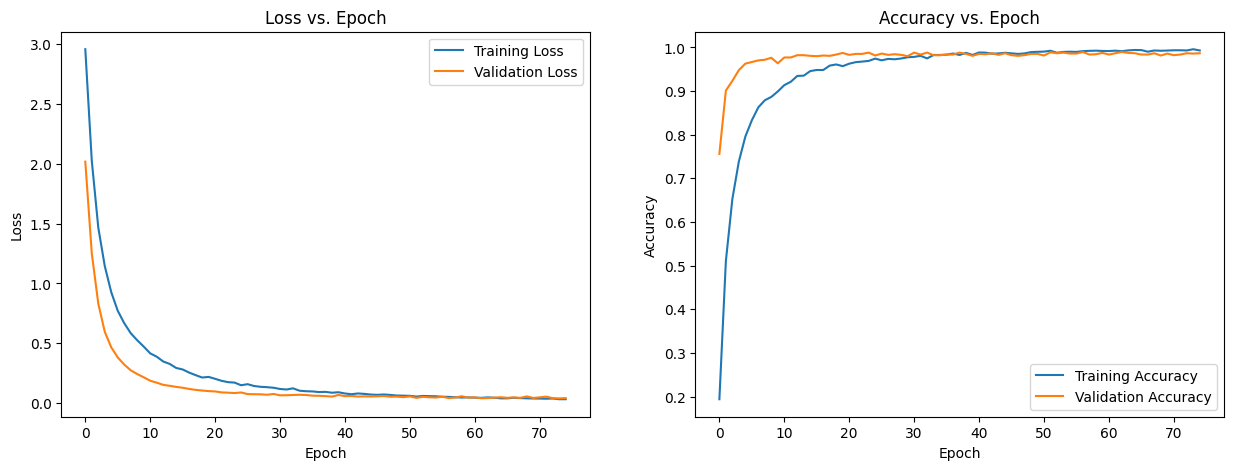

In [15]:
plt.figure(figsize=(15,5))

# Membuat plot loss terhadap epoch
plt.subplot(1,2,1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Membuat plot akurasi terhadap epoch
plt.subplot(1,2,2)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Predict and Evaluate the Model on Test Data

To predict and evaluate the model on test data, we can use the following steps:

- Create an image data generator for test data with rescale 1./255 using the `tf.keras.preprocessing.image.ImageDataGenerator` class from tensorflow. This class allows us to rescale the pixel values of the images to a range between 0 and 1, which is a common practice for neural network inputs.
- Load test data from directory with test_datagen using the `flow_from_directory` method of the image data generator. This method takes in several arguments, such as:
  - The directory path where the test images are stored.
  - The target size of the images after resizing.
  - The color mode of the images (RGB or grayscale).
  - The batch size for generating batches of images.
  - The class mode for generating labels (None or categorical).
  - The shuffle option to shuffle the images or not.
- Predict the model on test data using the `predict` method of the model. This method takes in the test data generator and returns an array of probabilities for each class for each image. We will store this array in a variable called `predictions`.
- Convert predictions to class labels using numpy and list comprehension. We will use the `np.argmax` function from numpy to get the index of the highest probability for each image. We will then use list comprehension to map these indices to the class labels that correspond to them. We will get the class labels from the test generator using its `class_indices` attribute, which is a dictionary that maps each label to an index. We will store the predicted labels in a variable called `predicted_labels`.
- Print the predicted labels using the `print` function.
- Evaluate the model on test data using sklearn and confusion matrix. We will use the `confusion_matrix` function from `sklearn.metrics` to create a confusion matrix that shows how many images are correctly and incorrectly classified by our model. We will pass in the true labels and the predicted labels as arguments to this function. We will get the true labels from the test generator using its `labels` attribute, which is an array of indices for each image. We will store the confusion matrix in a variable called `cm`.
- Calculate error rate for each class using numpy and list comprehension. We will use numpy and list comprehension to calculate the error rate for each class, which is defined as the number of incorrect predictions divided by the total number of predictions. We will use numpy's diagonal and sum functions to get these values from the confusion matrix. We will store the error rate in a variable called `error_rate`.
- Print the error rate for each class using the `print` function.

In [16]:
DATADIR = './dataset/'
TEST_PATH = DATADIR + 'Test'
CATEGORIES = [chr(i + 65) for i in range(26)] + ['spasi']

# Create image data generator for test data with rescale 1./255
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load test data from directory with test_datagen
test_generator = test_datagen.flow_from_directory(
    TEST_PATH, # directory of test images
    target_size=(224, 224), # resize images to 224x224
    color_mode='rgb', # use rgb images for VGG16
    batch_size=1, # use batch size of 1 for prediction
    class_mode=None, # do not use labels for prediction
    shuffle=False # do not shuffle the images
)

Found 243 images belonging to 27 classes.


In [17]:
predictions = model.predict(test_generator)

2023-06-03 18:20:35.916974: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


243/243 [==============================] - 38s 155ms/step


In [18]:
predictions_ = np.argmax(predictions, axis=1)

# Convert predictions to class labels according to the dataset
class_labels = list(test_generator.class_indices.keys()) # get the class labels from the test generator
predicted_labels = [class_labels[p] for p in predictions_] # map the predictions to the class labels

# Print the predicted labels
print(predicted_labels)

['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'M', 'E', 'E', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'G', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'J', 'I', 'J', 'J', 'J', 'J', 'J', 'J', 'J', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'Q', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'V', 'W', 'W',

In [19]:
from sklearn.metrics import confusion_matrix

# Get the true labels from the test generator
true_labels = test_generator.labels

# Create confusion matrix using sklearn
cm = confusion_matrix(true_labels, predictions_)

# Calculate error rate for each class by dividing the number of incorrect predictions by the total number of predictions
error_rate = 1 - cm.diagonal() / cm.sum(axis=1)

# Print the error rate for each class
print(error_rate)

[0.         0.         0.         0.         0.11111111 0.
 0.         0.         0.         0.11111111 0.         0.
 0.         0.         0.         0.         0.         0.
 0.44444444 0.         0.         0.         0.         0.
 0.         0.         0.        ]


We can see that our model predicted some classes correctly and some incorrectly on the test data. The error rate for each class shows how often our model made a mistake for that class.

# Define a Function to Predict the Label for an Image

To predict the label for an image using our model, we can define a function that takes in an image as an argument and returns the predicted label as a string. We will call this function `predicted_label` and use the following steps inside it:

- Rescale the pixel values of the image to a range between 0 and 1 using numpy. This is the same rescaling that we applied to our test data generator.
- Resize the image to 224x224 pixels using `cv2.resize` from opencv. This is the same target size that we used for our test data generator and our model input.
- Reshape the image to add a batch dimension using numpy. This is because our model expects a batch of images as input, even if it is only one image. We will use the `reshape` method of numpy to add a dimension of size 1 at the beginning of the image shape.
- Predict the model on the reshaped image using the `predict` method of the model. This method returns an array of probabilities for each class for the image.
- Convert the prediction to a class label using numpy and list comprehension. We will use the `np.argmax` function from numpy to get the index of the highest probability for the image. We will then use list comprehension to map this index to the class label that corresponds to it. We will get the class labels from the global variable `CATEGORIES`, which we have defined earlier as a list of letters of the alphabet.
- Return the predicted label as a string.

In [20]:
def predicted_label(input_image):
  img_rescale = (input_image * 1.0) / 255.0
  img_resize = cv2.resize(img_rescale, (224, 224))
  img_resize_expand = img_resize.reshape(1, *img_resize.shape)
  my_prediction = model.predict(img_resize_expand)
  my_label = CATEGORIES[np.argmax(my_prediction)]
  return my_label

# Display an Image and its Predicted Label

To display an image and its predicted label from our test data, we can use the following steps:

- Get the list of subdirectories in our test data directory using `os.listdir`. We will store this list in a variable called `get_test_dir`.
- Loop through each subdirectory in `get_test_dir` using a for loop. We will use `img_dir` as our loop variable.
- Join the path of each subdirectory with our test data directory using `os.path.join`. We will store this path in a variable called `join_path_subdir`.
- Get the list of images in each subdirectory using `os.listdir`. We will loop through each image using another for loop. We will use `img` as our loop variable.
- Join the path of each image with its subdirectory path using `os.path.join`. We will store this path in a variable called `target_img`.
- Read the image from its path using `cv2.imread` from opencv. We will use `cv2.COLOR_BGR2RGB` as an argument to convert the image from BGR to RGB color mode. We will store this image in a variable called `read_img`.
- Call our `predicted_label` function on `read_img` and store its return value in a variable called `my_label`.
- Plot the image and its predicted label using matplotlib. We will use `plt.imshow` to show the image and `plt.title` to show the label.
- Break out of both loops after displaying one image.

1/1 [==============================] - 0s 237ms/step


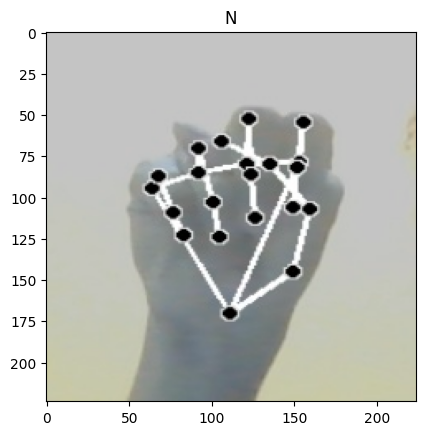

In [21]:
get_test_dir = os.listdir(TEST_PATH)

for img_dir in get_test_dir:
  join_path_subdir = os.path.join(TEST_PATH, img_dir)
  for img in os.listdir(join_path_subdir):
    target_img = os.path.join(join_path_subdir, img)
    read_img = cv2.imread(target_img, cv2.COLOR_BGR2RGB)
    
    ## Preparation Code for prepraprocess
    my_label = predicted_label(read_img)
    ## End Preparation Code for prepraprocess
    
    plt.imshow(read_img)
    plt.title(my_label)
    plt.show()
    break
  break


We can see that our model correctly predicted A for this image.